Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*//*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*//*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, labels='inferred', color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), seed=123, validation_split=0.2, subset='training'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, labels='inferred', color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), seed=123, validation_split=0.2, subset='validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

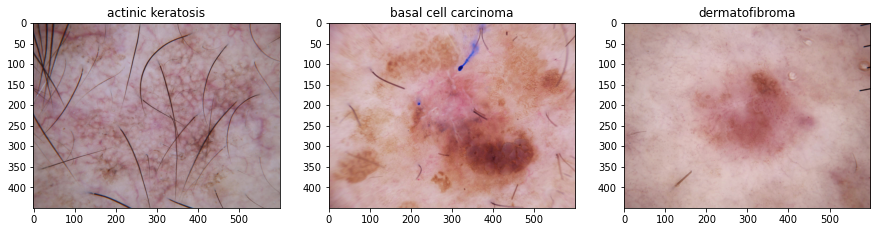

In [10]:
# Visualising the images of the different classes
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
img1 = plt.imread(str(list(data_dir_train.glob(class_names[0]+'/*.jpg'))[1]))
plt.title(class_names[0])
plt.imshow(img1)
plt.subplot(1,3,2)
img2 = plt.imread(str(list(data_dir_train.glob(class_names[1]+'/*.jpg'))[1]))
plt.title(class_names[1])
plt.imshow(img2)
plt.subplot(1,3,3)
img3 = plt.imread(str(list(data_dir_train.glob(class_names[2]+'/*.jpg'))[1]))
plt.title(class_names[2])
plt.imshow(img3)
plt.show()

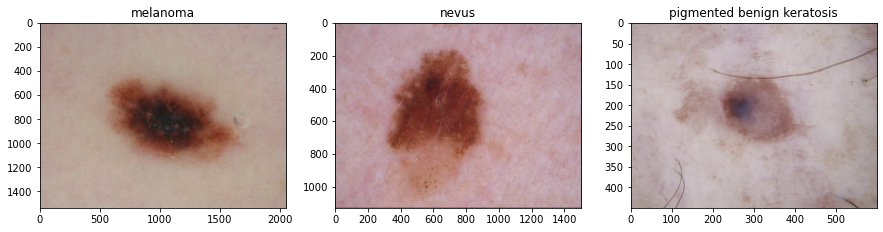

In [11]:
# Visualising the images of the different classes
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
img4 = plt.imread(str(list(data_dir_train.glob(class_names[3]+'/*.jpg'))[1]))
plt.title(class_names[3])
plt.imshow(img4)
plt.subplot(1,3,2)
img5 = plt.imread(str(list(data_dir_train.glob(class_names[4]+'/*.jpg'))[1]))
plt.title(class_names[4])
plt.imshow(img5)
plt.subplot(1,3,3)
img6 = plt.imread(str(list(data_dir_train.glob(class_names[5]+'/*.jpg'))[1]))
plt.title(class_names[5])
plt.imshow(img6)
plt.show()

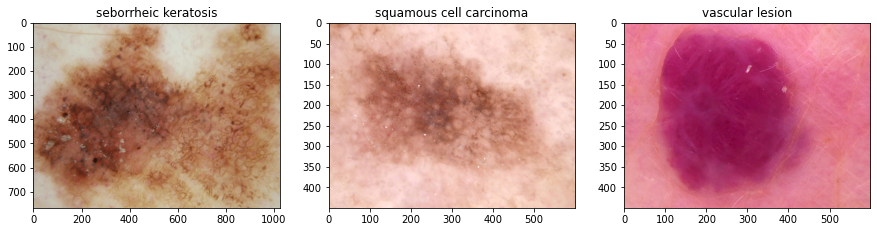

In [12]:
# Visualising the images of the different classes
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
img7 = plt.imread(str(list(data_dir_train.glob(class_names[6]+'/*.jpg'))[1]))
plt.title(class_names[6])
plt.imshow(img7)
plt.subplot(1,3,2)
img8 = plt.imread(str(list(data_dir_train.glob(class_names[7]+'/*.jpg'))[1]))
plt.title(class_names[7])
plt.imshow(img8)
plt.subplot(1,3,3)
img9 = plt.imread(str(list(data_dir_train.glob(class_names[8]+'/*.jpg'))[1]))
plt.title(class_names[8])
plt.imshow(img9)
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# First conv layer
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Second conv layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Third conv layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#Maxpool layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Fourth conv layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#Maxpool layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Fifth conv layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#Maxpool layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu')) # fully connected

# Softmax layer for final classification
model.add(Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        4

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 14s 204ms/step - loss: 2.0247 - accuracy: 0.2221 - val_loss: 1.8736 - val_accuracy: 0.3848
Epoch 2/20
56/56 [==============================] - 10s 185ms/step - loss: 1.7280 - accuracy: 0.3733 - val_loss: 1.6116 - val_accuracy: 0.4474
Epoch 3/20
56/56 [==============================] - 10s 186ms/step - loss: 1.5122 - accuracy: 0.4475 - val_loss: 1.4753 - val_accuracy: 0.4922
Epoch 4/20
56/56 [==============================] - 10s 186ms/step - loss: 1.4383 - accuracy: 0.4766 - val_loss: 1.4379 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 10s 185ms/step - loss: 1.3481 - accuracy: 0.5201 - val_loss: 1.3528 - val_accuracy: 0.5414
Epoch 6/20
56/56 [==============================] - 10s 186ms/step - loss: 1.3265 - accuracy: 0.5223 - val_loss: 1.3646 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 10s 186ms/step - loss: 1.2286 - accuracy: 0.5569 - val_loss: 1.3800 - val_accuracy: 0.5078

### Visualizing training results

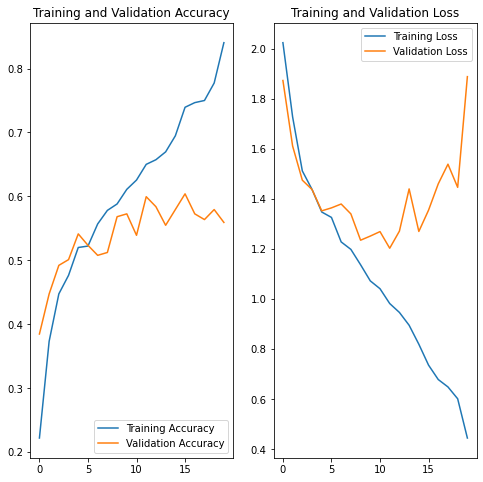

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Findings:

- The training accuracy of the CNN model increases with the epochs almost linearly. But the validation accuracy gets saturated around **0.5**. This suggests that the model is **overfitting** the training dataset and losing on **generalisability**.
- On the loss side, we can see that the training loss decreases with more numner of epochs while the validation loss saturates after a few epochs and starts increasing after a few epochs as well.

#### In order to deal with the model overfitting, we are going to use data augumentation strategy.

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("vertical", 
                                                 input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

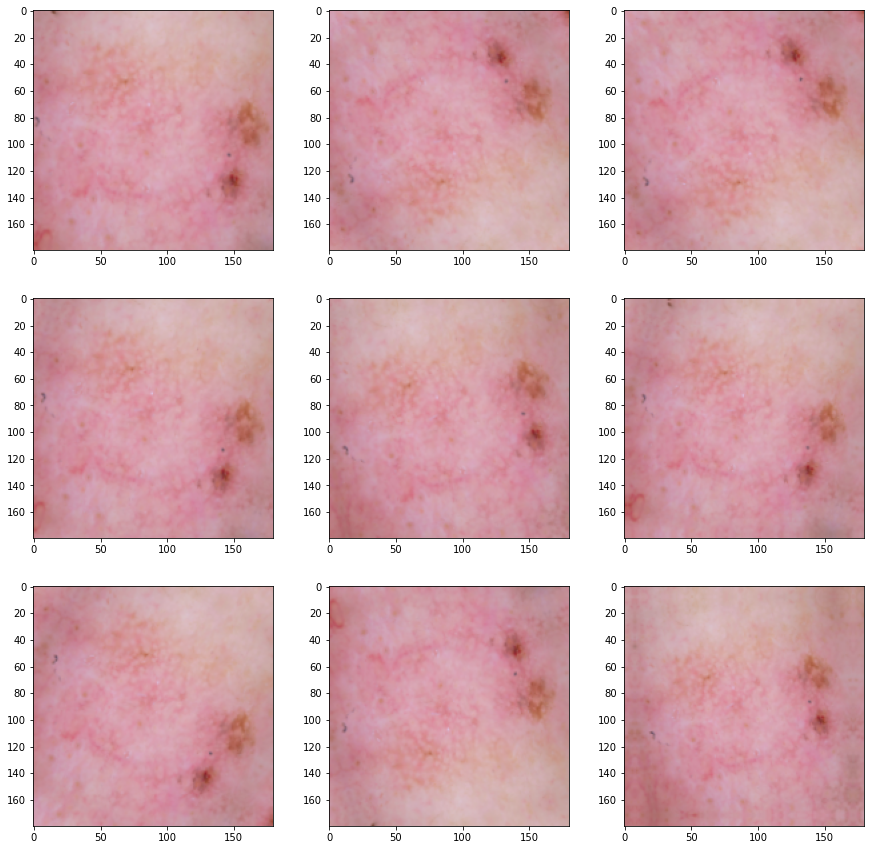

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(15, 15))
for images, label in train_ds.take(5):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[1].numpy().astype("uint8"))

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model_gen = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# First conv layer
model_gen.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model_gen.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Second conv layer
model_gen.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model_gen.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Third conv layer
model_gen.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model_gen.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Fourth conv layer
model_gen.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model_gen.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Fifth conv layer
model_gen.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model_gen.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))


# Flatten and put a fully connected layer
model_gen.add(Flatten())
model_gen.add(Dense(512, activation='relu')) # fully connected
#Adding dropout
model_gen.add(Dropout(0.25))

# Softmax layer for final classification
model_gen.add(Dense(num_classes, activation='softmax'))

### Compiling the model

In [22]:
## Your code goes here
model_gen.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
history = model_gen.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 13s 218ms/step - loss: 2.0633 - accuracy: 0.1897 - val_loss: 1.9939 - val_accuracy: 0.2371
Epoch 2/20
56/56 [==============================] - 12s 217ms/step - loss: 1.9422 - accuracy: 0.2533 - val_loss: 1.9526 - val_accuracy: 0.2685
Epoch 3/20
56/56 [==============================] - 12s 213ms/step - loss: 1.9159 - accuracy: 0.2695 - val_loss: 1.8825 - val_accuracy: 0.2886
Epoch 4/20
56/56 [==============================] - 12s 215ms/step - loss: 1.8572 - accuracy: 0.2969 - val_loss: 1.8134 - val_accuracy: 0.3065
Epoch 5/20
56/56 [==============================] - 12s 217ms/step - loss: 1.8333 - accuracy: 0.3147 - val_loss: 1.6934 - val_accuracy: 0.3937
Epoch 6/20
56/56 [==============================] - 12s 216ms/step - loss: 1.6814 - accuracy: 0.3923 - val_loss: 1.6381 - val_accuracy: 0.3937
Epoch 7/20
56/56 [==============================] - 12s 217ms/step - loss: 1.6159 - accuracy: 0.4213 - val_loss: 1.4516 - val_accuracy: 0.5034

### Visualizing the results

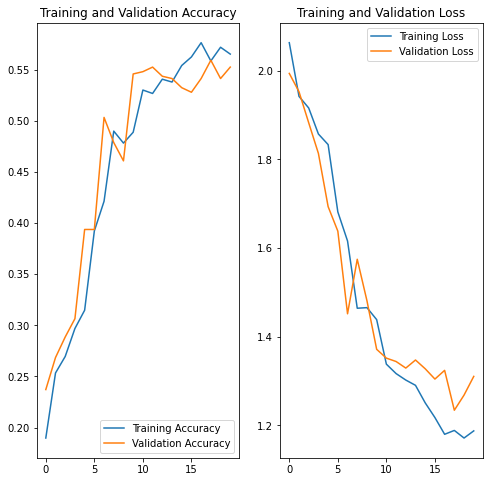

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Findings:

- The problem of overfitting was reduced to a huge extent using data augmentation strategy.
- The model starts to show signs of underfitting since the accuracy for both training and validation dips down to 0.5

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
## Your code goes here.
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
print(path_list[:5])

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg']


In [26]:
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [27]:
dict_original_df = dict(zip(path_list, lesion_list))
print(list(dict_original_df.items())[:2])

[('Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis')]


In [28]:
original_df = pd.DataFrame(list(dict_original_df.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis


In [29]:
Img_count = original_df.groupby(['Label'])['Label'].count()
Perct = round(original_df.groupby(['Label'])['Label'].count()*100.0/len(original_df.index),2)
df = pd.DataFrame({'Img_count':Img_count,'Perct':Perct}).reset_index().sort_values(by = 'Img_count', ascending=False)
print(df)

                        Label  Img_count  Perct
5  pigmented benign keratosis        462  20.63
3                    melanoma        438  19.56
1        basal cell carcinoma        376  16.79
4                       nevus        357  15.94
7     squamous cell carcinoma        181   8.08
8             vascular lesion        139   6.21
0           actinic keratosis        114   5.09
2              dermatofibroma         95   4.24
6        seborrheic keratosis         77   3.44


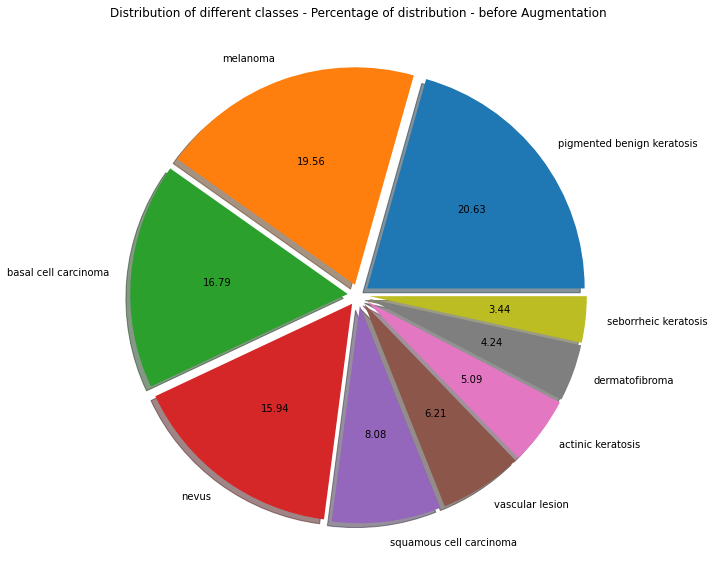

In [30]:
# Distribution of different classes - Percentage of distribution - before Augmentation
plt.figure(figsize=[10,10])
explode =(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05) 
plt.pie(df['Img_count'],labels=df['Label'], autopct='%.2f',explode= explode, shadow=True)
plt.title('Distribution of different classes - Percentage of distribution - before Augmentation')
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

`seborrheic keratosis(3.44%)` has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?

`pigmented benign keratosis(20.63%)`, `melanoma(19.56%)`, `basal cell carcinoma(16.79%)`, `nevus(15.94%)` dominate the data in terms of proportionate number of image counts

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2841E22C070>: 100%|█| 500/500 [00:02<00:


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2841CF86BE0>: 100%|█| 500/500 [00:02<00:00, 240.97 Samples


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2841CF86100>: 100%|█| 500/500 [00:02<00:00, 232.07 Samples


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x28418867E50>: 100%|█| 500/500 [00:11<0


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x28418790D30>: 100%|█| 500/500 [00:09<00:


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x284196D08E0>: 100%|█| 500/500 [00:02<00:00, 246.25 Samples


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x28418782B80>: 100%|█| 500/500 [00:04<00:00, 106.44 Sample


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x284196D0700>: 100%|█| 500/500 [00:01<00:00, 253.88 Samples


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2841D03D7C0>: 100%|█| 500/500 [00:02<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [34]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e69f3426-75c9-4721-a51c-b7bd0e15cc80.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_09d08aa7-e98c-4bff-af5c-25b6fd857004.jpg']

### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [36]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [37]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [38]:
Img_count = new_df.groupby(['Label'])['Label'].count()
Perct = round(new_df.groupby(['Label'])['Label'].count()*100.0/len(new_df.index),2)
df = pd.DataFrame({'Img_count':Img_count,'Perct':Perct}).reset_index().sort_values(by = 'Img_count', ascending=False)
print(df)

                        Label  Img_count  Perct
5  pigmented benign keratosis        962  14.28
3                    melanoma        938  13.92
1        basal cell carcinoma        876  13.00
4                       nevus        857  12.72
7     squamous cell carcinoma        681  10.11
8             vascular lesion        639   9.48
0           actinic keratosis        614   9.11
2              dermatofibroma        595   8.83
6        seborrheic keratosis        577   8.56


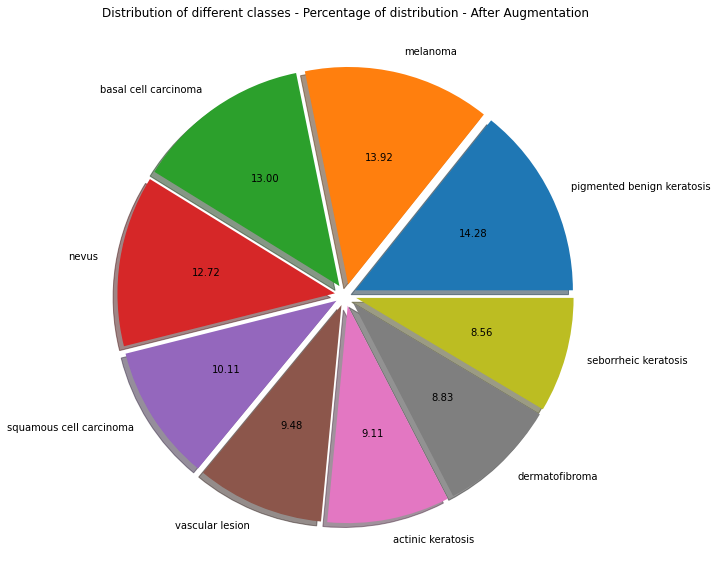

In [39]:
# Distribution of different classes - Percentage of distribution - After Augmentation
plt.figure(figsize=[10,10])
explode =(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05) 
plt.pie(df['Img_count'], labels=df['Label'], autopct='%.2f',explode= explode, shadow=True)
plt.title('Distribution of different classes - Percentage of distribution - After Augmentation')
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model2 = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# second conv layer
model2.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# first conv layer
model2.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# second conv layer
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# third conv layer
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# third conv layer
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# Maxpool layer
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))


# flatten and put a fully connected layer
model2.add(Flatten())
model2.add(Dense(512, activation='relu')) # fully connected
#Adding dropout
model2.add(Dropout(0.25))

# softmax layer
model2.add(Dense(num_classes, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## Your code goes here
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [45]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/30
169/169 [==============================] - 42s 244ms/step - loss: 1.9768 - accuracy: 0.2315 - val_loss: 1.6949 - val_accuracy: 0.3727
Epoch 2/30
169/169 [==============================] - 40s 236ms/step - loss: 1.5941 - accuracy: 0.3787 - val_loss: 1.5640 - val_accuracy: 0.3912
Epoch 3/30
169/169 [==============================] - 40s 236ms/step - loss: 1.4737 - accuracy: 0.4368 - val_loss: 1.4089 - val_accuracy: 0.4514
Epoch 4/30
169/169 [==============================] - 40s 236ms/step - loss: 1.4050 - accuracy: 0.4522 - val_loss: 1.3935 - val_accuracy: 0.4736
Epoch 5/30
169/169 [==============================] - 40s 235ms/step - loss: 1.3246 - accuracy: 0.4852 - val_loss: 1.3131 - val_accuracy: 0.4885
Epoch 6/30
169/169 [==============================] - 40s 235ms/step - loss: 1.2837 - accuracy: 0.5007 - val_loss: 1.2193 - val_accuracy: 0.5286
Epoch 7/30
169/169 [==============================] - 40s 237ms/step - loss: 1.2341 - accuracy: 0.5234 - val_loss: 1.1746 - val_ac

#### **Todo:**  Visualize the model results

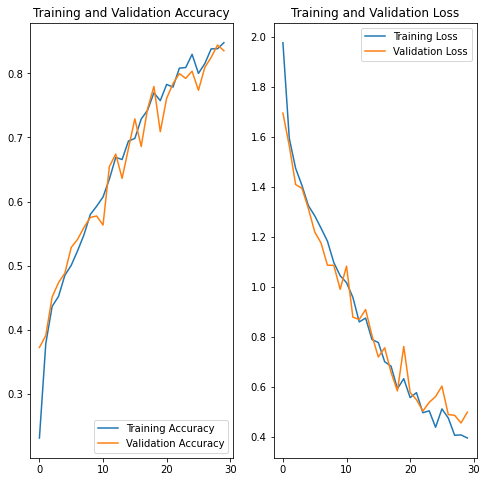

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- We can see in the above model (final) that the problem of both overfitting and underfitting were resolved using data augmentation and class balancing.
- Class balancing improved the model accuracy for both train and validation data. In 30 epochs, the model is able to achieve approximately **84%** training accuracy and **83%** validation accuracy.
- The model can be further improved by adding more layers, neurons or proper hyperparameter tuning, adding more training examples etc.